In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# A1.2 Polynomial Curve Fitting

## Introduction
The Polynomiacl Curve Fitting is a regression problem, which we will be used as a Study Case in order to introduce the key concepts related to Modelling. The following Study Case is based on the book:

> C. M. Bishop (2006). Pattern Recognition and Machine Learning. 

The Study Case is structured as follows:
1. Problem Description
2. Polynomial Curve Fitting
3. Application

## 1. Problem Description

Consider the data provided in the files:
* `data/data_train.csv`
* `data/data_test.csv`

The data contains two columns `x`y `t`. Suppose we observe have a input variable $x$ and we want to use this observation to predict the value of a target variable $t$. 

For the porpuse of this teaching material the files contains synthetically generated data. The data for this Study Case was generated from the function $sin(2\pi x)$ with random noise in the target values.

The goal is to exploit the data in order to make predictions of the value $\hat{t}$ of the target variable for some new value of the input variable. 

In [6]:
data = pd.read_csv("data/data_train.csv")

x = data['x'].values
y = data['y'].values

**T1.** Make a plot with the `data` (`y` and `x`) including the curve $sin(2\pi x)$ that was used to generate the data.

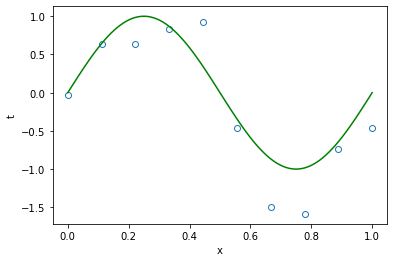

In [7]:
### BEGIN SOLUTION
xsin = np.linspace(0, 1, 100)
ysin = np.sin(2 * np.pi * xsin)

fig, ax = plt.subplots()
ax.plot(x, y, '.', marker = 'o', markerfacecolor='none')
ax.plot(xsin, ysin, '-', color = 'green')
ax.set(xlabel='x', ylabel='t')

plt.show()
### END SOLUTION

## 2. Polynomial Curve Fitting

In this Study Case, we shall fit the data using a Polynomial Function of the form:

$$ \hat{y}(x,\vec{w}) = w_0 + w_1 x + w_2 x^2 + w_3 x^3 + ... + w_M x^M$$

$$ \hat{y}(x,\vec{w}) = \sum_{j=0}^M w_i x^j$$

where $M$ is the order of the polynomial, and $x^j$ denotes $x$ raised to the power of $j$. The polynomials coefficients $w_0$, $w_1$, $\dots$, $w_M$ are collective denotes by the vector $\vec{w}$.

Note that, although the polynomial function $$ \hat{y}(x,\vec{w})$$ is a nonlinear function of $x$, it is a linear function of the coefficients $\vec{w}$. Functions, such as the polynomial, which are linear in the unknown parameters are called *linear models*.

The values of the coefficients will be determined by fitting the polynomial to the training data. The misfit between the function $$ \hat{y}(x,\vec{w})$$ for a given value of $\vec{w}$ (predicted values of $t$) and the training set data points $t$ can be measured with an *error function*. The error function shall be minimized in order to fit the polynomial to the data. 

In this Study Case, the error function will be given by the sum of the squares of the errors between the predictions for each data point and the corresponding target values,

$$ E (\vec{w})= \frac{1}{2} \sum_{n=1}^{N} \{y(x_n, \vec{w})-t_n\}^2 $$

The factor 1/2 is included for later convenience. The curve fitting problem is solved by choosing the value of $\vec{w}$ for which $E(\vec{w})$ is as small as possible. Because the error function is a quadratic function of the coefficients $\vec{w}$, and so the minimization of the error function has a unique solution, denoted by $w^\star$. The resulting polynomial is given by the function $$ \hat{y}(x,\vec{w^\star})$$.

**T2** Create a function `predict(x,w)` which predicts *t* based on the observations of the input variable `x` and the polynomial coefficient `w`. Consider as inputs:
* `x`: a vector including all the values of the input variable x for a given set of point.
* `w`: polynomial coefficient vector.

In [15]:
def predict(x, w):
    """
    Function to obtain the prediction
    
    Input:
        x: [Array] Independent Variable.
        w: [Array] Polynomial Coefficients.
        M: [Float] Order of the Polynomial.
        
    Output:
        y: [Array] Predictions
    """
    
    ### BEGIN SOLUTION


    M = len(w)-1
    y = [w[i] * (x ** i) for i in range((M+1))]
    y = np.array(y)
    y = sum(y)
    
    ### END SOLUTION
    return y

**T3** Create a function `fit(x,t, M)` which fit a M-th degree polynomial to the data. The function should return $w^\star$. Consider as inputs:
* `x`: a vector including all the values of the input variable x for a given set of point.
* `t`: a vector including all the values of the target variable t for a given set of point.
* `M`: the degree of the polynomial to be fitted.

In [9]:
def fit(x,t, M):
    """
    Function to obtain the vector w by a fitting
    a M-th order polynomial.
    
    Input:
        x: [Array] Independent Variable
        t: [Array] Depedendent Variable
        M: [Float] Order of the Polynomial.
        
    Output:
        w: [Array] w vector.
    """
    
    ### BEGIN SOLUTION

    # A w = B
    
    # 1. Obtaining Matrix A
    A = np.zeros((M+1, M+1))

    for i in range(M+1):
        for j in range(M+1):
            A[i,j] = (x**(i+j)).sum()
            
    # 2. Obtaining Vector B
    B = np.zeros(M+1)
    for i in range(M+1):
        B[i] = ((x**i) * t).sum()
    
    # 3. Obtaining A^-1
    A_inv = np.linalg.inv(A)
    
    # 3. Obtaining Vector w (w = A^-1 B)
    w = A_inv @ B
    
    ### END SOLUTION
    return w

**T4** Create a function `rmse(y, t)` computes the root-mean-square error given the predicted value `y`and the target values `t`. Consider as inputs:
* `y`: a vector including all the predicted values of the target variable for a given set of point.
* `t`: a vector including all the values of the target variable t for a given set of point.

In [16]:
def rmse(y_prediction, t):
    """
    Function to get Root-Mean-Square Error
    
    Input:
        y_prediction: [array] observed y values
        y_real: [array] real values of y
        
    Output:
        RMSE: Returns the root-mean-squared error value
    """
    ### BEGIN SOLUTION


    error = ((y_prediction - t)**2) 
    RMSE = np.sqrt(error.mean())
    
    ### END SOLUTION

    return RMSE

The *generalization* is the ability to categorize correctly new examples that differ from those used for training. In order to measure this property in the model it is common to split the data into two sets: training and test set. The train set is used to obtain $w^\star$ and test set to estimate the performance of the model. In our particular Study Case, the estimation of the model performance is given by the root-mean-square error. The test set error is a measure of how well we are doing in predicting the values of $t$ for new data observations of $x$.

**T5** Make a comparison (plot) of the root-mean-square error in the trainning set and test set with different values of M (from 0 to 9). 

> Try to reproduce Figure 1.5 of the cited book.

In [11]:
data = pd.read_csv("data/data_test.csv")
x_test = data['x'].values
y_test = data['y'].values

x_train = x
y_train = y

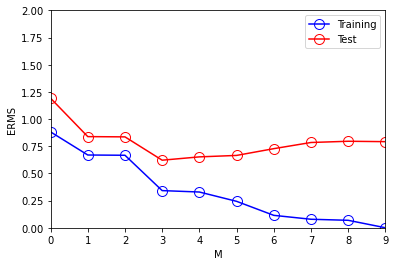

In [17]:
training_error = []
test_error = []

for i in range(10):
    # Seleccionar el número de términos
    M = i
    
    ### BEGIN SOLUTION

    # Ajustar los datos utilizando x_train & y_train
    w = fit(x_train,y_train, M)
    
    # Predecir valores en conjunto de entrenamiento (x_train)
    training_prediction = predict(x_train, w)
    
    # Predecir valores en conjunto de evaluación (y_train)
    test_prediction = predict(x_test, w)
    
    # Agregar errores en la lista corresondiente
    training_error.append(rmse(training_prediction, y_train))
    test_error.append(rmse(test_prediction, y_test))

    ### END SOLUTION

fig, ax = plt.subplots()
ax.plot(training_error,  'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
ax.plot(test_error, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
ax.set(xlabel = 'M', ylabel = 'ERMS')  
ax.set_xlim([0,9])
ax.set_ylim([0,2])
plt.legend()
plt.show()